In [0]:
% tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [0]:
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0-rc2
Running on TPU  ['10.105.51.2:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.105.51.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.105.51.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


### 1. 讀入 Fashion MNSIT 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### 2. 欣賞數據集內容

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


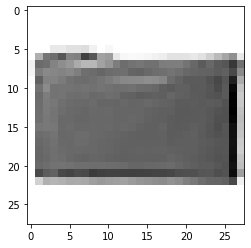

In [0]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

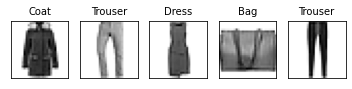

In [0]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

### 3. 建構神經網路

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [0]:
len(set(y_train))

10

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
model = Sequential()

model.add(BatchNormalization(input_shape=x_train.shape[1:]))

model.add(Conv2D(16, (5, 5), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(BatchNormalization(input_shape=x_train.shape[1:]))

model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(BatchNormalization(input_shape=x_train.shape[1:]))

model.add(Conv2D(64, (5, 5), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model_tpu = model

In [0]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2)
train_history = model_tpu.fit(x_train, y_train, batch_size = 50, epochs = 50, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
1080/1080 [==============================] - 19s 18ms/step - loss: 0.6261 - accuracy: 0.7741 - val_loss: 0.3706 - val_accuracy: 0.8610
Epoch 2/50
1080/1080 [==============================] - 19s 17ms/step - loss: 0.4176 - accuracy: 0.8488 - val_loss: 0.3170 - val_accuracy: 0.8757
Epoch 3/50
1080/1080 [==============================] - 19s 18ms/step - loss: 0.3684 - accuracy: 0.8671 - val_loss: 0.2847 - val_accuracy: 0.8920
Epoch 4/50
1080/1080 [==============================] - 19s 18ms/step - loss: 0.3375 - accuracy: 0.8772 - val_loss: 0.2703 - val_accuracy: 0.8995
Epoch 5/50
1080/1080 [==============================] - 19s 18ms/step - loss: 0.3188 - accuracy: 0.8859 - val_loss: 0.2618 - val_accuracy: 0.9033
Epoch 6/50
1080/1080 [==============================] - 19s 18ms/step - loss: 0.3010 - accuracy: 0.8902 - val_loss: 0.2442 - val_accuracy: 0.9048
Epoch 7/50
1080/1080 [==============================] - 19s 17ms/step - loss: 0.2891 - accuracy: 0.8958 - val_loss: 0.2493 -

### 4. 訓練成果

In [0]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train], color = 'r', label = 'train_' + train)
    plt.plot(train_history.history[validation], color = 'g', label = validation)
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

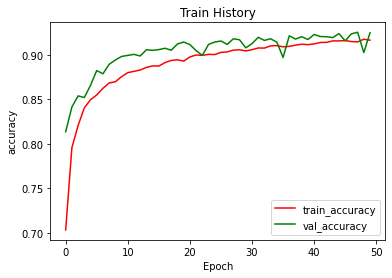

In [0]:
show_train_history(train_history, "accuracy", "val_accuracy")

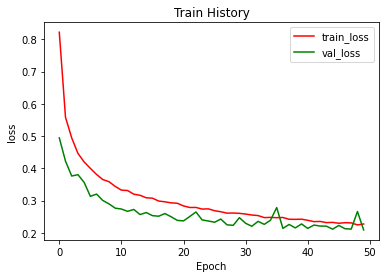

In [0]:
show_train_history(train_history, "loss", "val_loss")

In [0]:
scores = model_tpu.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2235 - accuracy: 0.9193


In [0]:
print("Accuracy: {}%".format(scores[1]*100))

Accuracy: 91.93000197410583%


### 5. 做的改變
1. 增加BatchNormalization層
2. 增加Dropout層
3. optimizer改成adam
4. loss改成categorical_crossentropy
5. 更改許多層的神經元數目